# 读取并分析实时联合仿真结果文件 SimResult.log

In [1]:
import pandas as pd

def read_large_log_file(file_path):
    # 使用chunksize参数来分块读取大文件
    # 设置sep='\t'因为数据是用制表符分隔的
    # 使用float_precision='high'来保持高精度数值
    chunks = pd.read_csv(
        file_path,
        sep='\t',
        float_precision='high',
        chunksize=10000  # 每次读取10000行
    )
    
    # 初始化一个空的DataFrame来存储结果
    df = pd.DataFrame()
    
    # 分块处理数据
    for chunk in chunks:
        # 这里可以对每个chunk进行处理
        # 例如：只保留某些列，或者进行一些计算
        df = pd.concat([df, chunk], ignore_index=True)
        
    return df

# 读取自编 C++ 代码与 SIMPACK 实时联合仿真的结果文件
file_path = '/home/yaoyao/Documents/myProjects/ROS2WithSPCK/SimResult.log'

try:
    # 读取数据
    df = read_large_log_file(file_path)
    
    # 显示基本信息
    print("SIMPACK Realtime Log 文件基本信息：")
    print(f"行数: {len(df)}")
    print(f"列数: {len(df.columns)}")

    # # 显示数据基本统计信息
    # print("\n数据统计信息：")
    # print(df.describe())

except FileNotFoundError:
    print(f"错误：找不到文件 {file_path}")
except Exception as e:
    print(f"发生错误：{str(e)}")

SIMPACK Realtime Log 文件基本信息：
行数: 25001
列数: 29


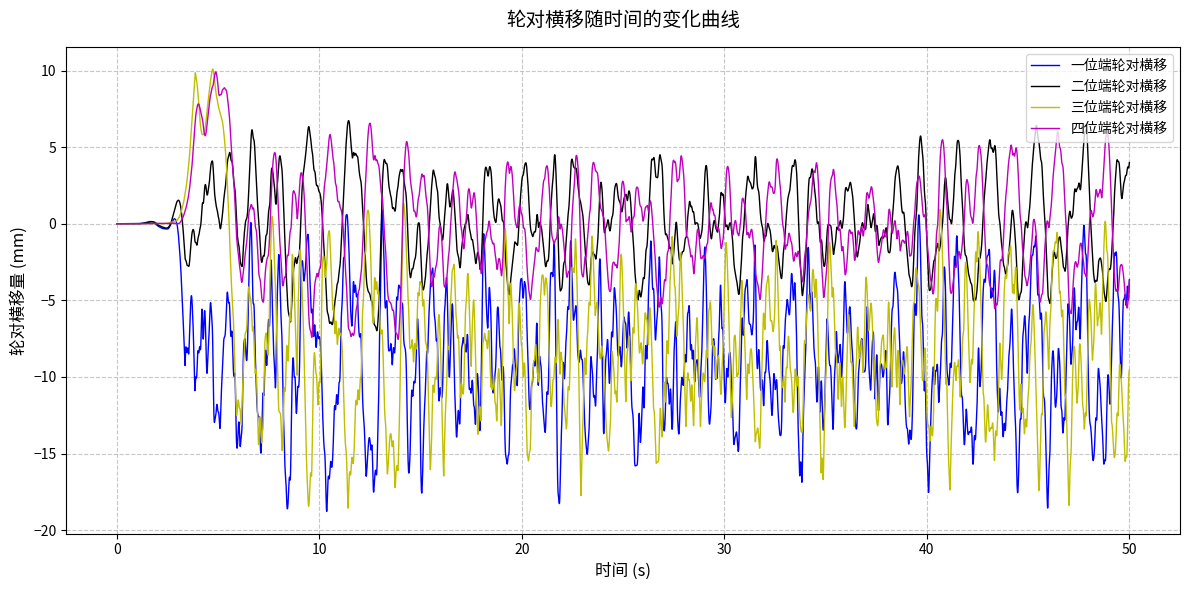

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
# 设置中文字体
plt.rcParams['font.family'] = ['Noto Sans CJK JP'] 

# 创建图形
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Time'], 1000 * df['$Y_Yw01'], 'b-', linewidth=1, label='一位端轮对横移')
ax.plot(df['Time'], 1000 * df['$Y_Yw02'], 'k-', linewidth=1, label='二位端轮对横移')
ax.plot(df['Time'], 1000 * df['$Y_Yw03'], 'y-', linewidth=1, label='三位端轮对横移')
ax.plot(df['Time'], 1000 * df['$Y_Yw04'], 'm-', linewidth=1, label='四位端轮对横移')

ax.set_title('轮对横移随时间的变化曲线', fontsize=14, pad=15)
ax.set_xlabel('时间 (s)', fontsize=12)
ax.set_ylabel('轮对横移量 (mm)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

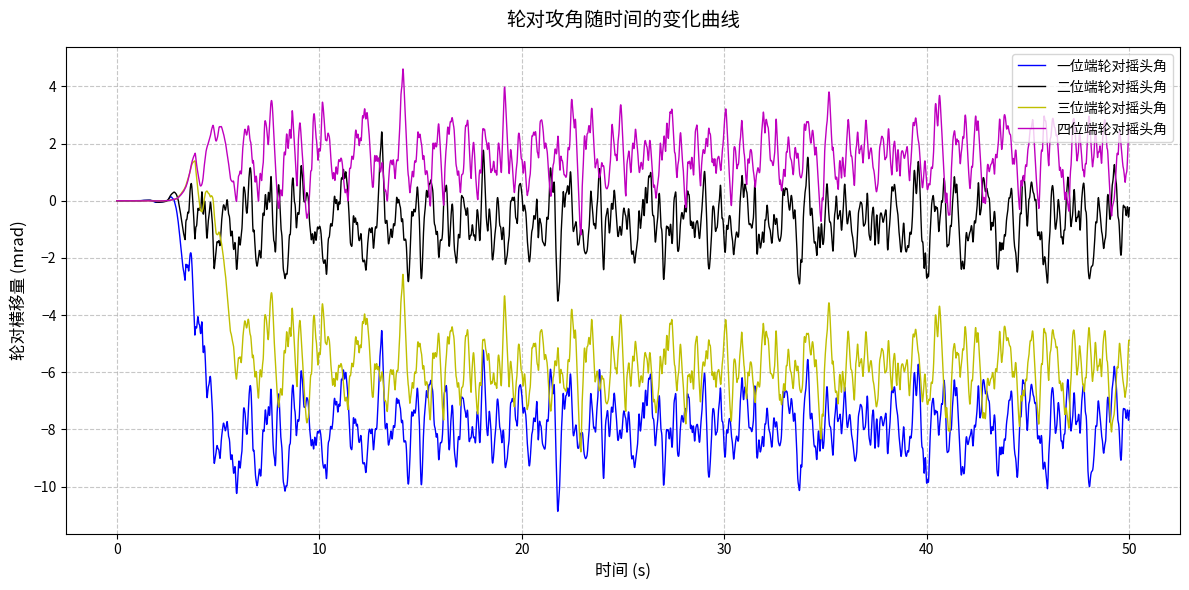

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
plt.rcParams['font.family'] = ['Noto Sans CJK JP']

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Time'], 1000 * df['$Y_Yaw01'], 'b-', linewidth=1, label='一位端轮对摇头角')
ax.plot(df['Time'], 1000 * df['$Y_Yaw02'], 'k-', linewidth=1, label='二位端轮对摇头角')
ax.plot(df['Time'], 1000 * df['$Y_Yaw03'], 'y-', linewidth=1, label='三位端轮对摇头角')
ax.plot(df['Time'], 1000 * df['$Y_Yaw04'], 'm-', linewidth=1, label='四位端轮对摇头角')
ax.set_title('轮对攻角随时间的变化曲线', fontsize=14, pad=15)
ax.set_xlabel('时间 (s)', fontsize=12)
ax.set_ylabel('轮对横移量 (mrad)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()